In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import parse_alphapose

In [2]:
kp, confs, scores, boxes = parse_alphapose.parse_alphapose('/home/akarshkumar0101/nba-3d-data/harden/', 90)

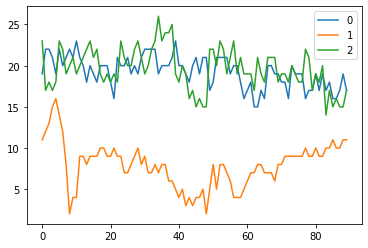

In [3]:
for view in range(3):
    num_people = np.array([len(frame) for frame in kp[view]])
    plt.plot(num_people, label=f'{view}')
plt.legend()

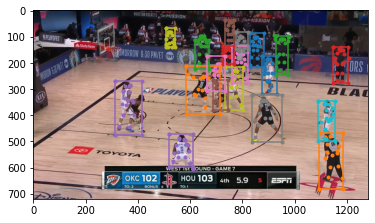

In [4]:
img = plt.imread('/home/akarshkumar0101/nba-3d-data/harden/view_0/frame_00000.png')
for kpi in kp[0][0]:
    plt.scatter(kpi[:, 0], kpi[:, 1], marker='.')
    
for boxi in boxes[0][0]:
    plt.plot(boxi[[0, 1, 1, 0, 0], 0], boxi[[0, 0, 1, 1, 0], 1], marker='.')
    if False:
        boxi=boxi.astype(int)
        img[boxi[0, 1]:boxi[1, 1], boxi[0, 0]:boxi[1, 0], :] = 1.
        
plt.imshow(img);plt.show()

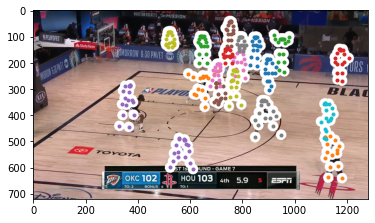

In [5]:
img = plt.imread('/home/akarshkumar0101/nba-3d-data/harden/view_0/frame_00000.png')

y, x = np.arange(img.shape[0]), np.arange(img.shape[1])
y, x = np.meshgrid(y, x, indexing='ij')

clr = np.zeros_like(x, dtype=bool)
for kpi in kp[0][0]:
    plt.scatter(kpi[:, 0], kpi[:, 1], marker='.')
    for kpii in kpi:
        r = np.sqrt((x-kpii[0])**2+(y-kpii[1])**2)
        clr = np.logical_or(clr, r<20)

img[clr, :] = 1.
plt.imshow(img)
plt.show()

In [8]:
keypoint_parents = [0,0,0,1,2, 0,0,5,6,7,8,5,6,11,12,13,14]

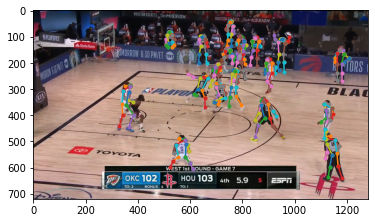

In [9]:
img = plt.imread('/home/akarshkumar0101/nba-3d-data/harden/view_0/frame_00000.png')

for kpi in kp[0][0]:
    for ji in range(17):
        pji = keypoint_parents[ji]
        x, px = kpi[ji], kpi[pji]
#         print(x)
#         print(px)
        plt.plot([x[0],px[0]],[x[1], px[1]], marker='.')
    
plt.imshow(img)
plt.show()

In [10]:
import cv2

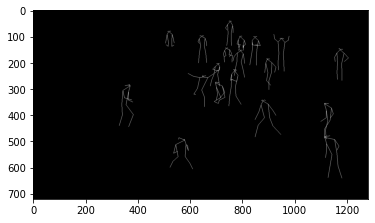

In [12]:
img = plt.imread('/home/akarshkumar0101/nba-3d-data/harden/view_0/frame_00000.png')

blank = np.zeros_like(img).astype(np.uint8)


for kpi in kp[0][0]:
    for ji in range(17):
        pji = keypoint_parents[ji]
        x, px = kpi[ji].astype(int), kpi[pji].astype(int)
        blank = cv2.line(blank, (x[0], x[1]),(px[0], px[1]), [255, 255, 255], 1)
plt.imshow(blank)
plt.show()

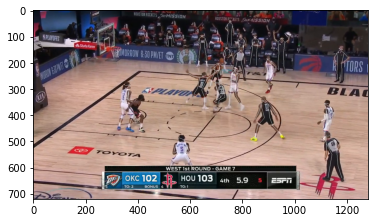

In [15]:
img = plt.imread('/home/akarshkumar0101/nba-3d-data/harden/view_0/frame_00000.png')

blank = np.zeros_like(img).astype(np.uint8)
for kpi in kp[0][0]:
    for ji in range(17):
        pji = keypoint_parents[ji]
        x, px = kpi[ji].astype(int), kpi[pji].astype(int)
        blank = cv2.line(blank, (x[0], x[1]),(px[0], px[1]), [255, 255, 255], 1)

blank = blank.mean(axis=-1)
blank = cv2.dilate(blank, np.ones((1,1), dtype=np.uint8))
img[blank>100, :] = 1
plt.imshow(img)
plt.show()

In [196]:
parents = [0,0,0,1,2, 0,0,5,6,7,8,5,6,11,12,13,14]

In [ ]:
Keypoint ordering: 
// Result for COCO (17 body parts)
    {0,  "Nose"},
    {1,  "LEye"},
    {2,  "REye"},
    {3,  "LEar"},
    {4,  "REar"},
    {5,  "LShoulder"},
    {6,  "RShoulder"},
    {7,  "LElbow"},
    {8,  "RElbow"},
    {9,  "LWrist"},
    {10, "RWrist"},
    {11, "LHip"},
    {12, "RHip"},
    {13, "LKnee"},
    {14, "Rknee"},
    {15, "LAnkle"},
    {16, "RAnkle"},
